# Vector Semantics

We have adapted this from lab 5.

### Introduction to word2vec

Word2vec is a very cool word embedding method that was developed by [Thomas Mikolov et al.](https://aclanthology.org/N13-1090/) Essentially, Word2Vec encodes words and their semantic content as high-dimensional vectors. One of the noteworthy things about the method is that it can be used to solve word analogy problems like:

$$ \textrm{man is to king as woman is to [blank]} $$

The missing word of the analogy is found by taking the vectors representing king, man and woman and performing some vector arithmetic to produce a vector that is close to the expected answer:

$$ king - man + woman \approx queen $$

In addition to solving this sort of analogy problem, the same sort of vector arithmetic was used with word2vec embeddings to find relationships between pairs of words like the following:

<img src="https://computational-linguistics-class.org/assets/img/word2vec_word_pair_relationships.jpg" width="350" height="350">

For an introduction to word embedings and specifically word2vec see chapters 6.1-6.3 and 6.8, respectively, of Jurafsky & Martin (on the Canvas website). 

Similarity between two word embedings is computed using cosine similarity: 
$$ cos(\textbf{v},\textbf{w}) = \frac{\textbf{v} \cdot \textbf{w}}{\|\textbf{v}\| \|\textbf{w}\|} $$
Where $\textbf{v}$ and $\textbf{w}$ are the vector representations of the two words to compare. 
See chapter 6.8 in Jurafsky & Martin for a more in-depth explination of cosine similarity. 


## Part 1: Exploring Analogies and Other Word Pair Relationships

In these first questions of the assignment, you will get familiar with the [Gensim](https://radimrehurek.com/gensim/intro.html) library.
You will use Gensim to load a vector model trained using word2vec, and use it to manipulate and analyze the vectors. 

First install the Gensim library: `$ pip install gensim` (or see [installation instructions](https://radimrehurek.com/gensim/intro.html)). 

In [2]:
! rm -rf sample_data

! pip install gensim

Defaulting to user installation because normal site-packages is not writeable


Now you can load the the vector model and perform queries. NOTE: The word2vec model is trained on the Google News dataset. It is quite large and will take some time to download.

In [3]:
import gensim.downloader as api
# Load the vector model 
vectors = api.load('word2vec-google-news-300')

For instance, you can query the distance of `cat` and `dog`. 

In [4]:
vectors.similarity("cat", "dog")

0.76094574

The following questions are designed to familiarize you with the Gensim word2vec package and get you thinking about what type of semantic information word embeddings can encode. We recommend reading the [Word2Vec Model tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py) of the Gensim documentation. 


### 1.1: What is the dimensionality of these word embeddings? 

Provide an integer answer. 

In [5]:
def compute_dimensionality(vectors):
    dim = vectors.vector_size
    # TODO your code here
    return dim

compute_dimensionality(vectors)

300

### 1.2: What are the top-5 most similar words to `picnic` (not including `picnic` itself)? 

Return an array of strings.

In [6]:
def find_top5(vectors, word):
    top5 = [w[0] for w in vectors.most_similar(word, topn=5)]
    # TODO your code here
    return top5

find_top5(vectors, "picnic")

['picnics', 'picnic_lunch', 'Picnic', 'potluck_picnic', 'picnic_supper']

### 1.3: According to the word embeddings, which of these words is not like the others? 
`['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']`


In [7]:
def find_other(vectors, words):
    other = ""
    similarities = []
    for word1 in words:
        other_words = [w for w in words if w != word1]
        # calculate the similarity between word1 and the other words
        sim = sum(vectors.similarity(word1, w) for w in other_words)
        similarities.append(sim)
    other = words[similarities.index(min(similarities))]
    return other

find_other(vectors, ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette'])

'tissue'

### 1.4: Solve the analogy: `man is to king as woman is to X?`

HINT: Think about the analogy in terms of vector arithmetic and cosine similatiry.

In [11]:
def solve_analogy(vectors, word1, word2, word3):
    # Returns word4 such that word1:word2::word3:word4
    word4 = ""
    # TODO your code here            
    word4 = vectors.most_similar(positive=[word1, word2], negative=[word3], topn=1)
    return word4[0][0]

solve_analogy(vectors, "man", "king", "woman")

'kings'

### 1.5: Come up with more analogies (another triple of words), and solve your new analogy with your function above. 

Find an analogy where the output makes sense and think about why we can capture such relation between words using an unsupervised algorithm. 
Where does the information come from? 

In [13]:
word1 = "man"
word2 = "actor"
word3 = "woman"

solve_analogy(vectors, word1, word2, word3)

'actress'

This makes sense -- the "feminine" form of "actor" is "actress".

Find an analogy where the output does not make sense and think about a hypothesis for why the algorithm fails on this case.

In [12]:
word1 = "man"
word2 = "doctor"
word3 = "woman"

solve_analogy(vectors, word1, word2, word3)

'gynecologist'

I found it interesting how a gynecologist is not exactly a "female doctor" but a doctor who tends to women/womanly functions. I presume this is because "doctoress" is not very common.

For a critical view of wor2vec, see [Linzen 2016](https://aclanthology.org/W16-2503.pdf)

## Part 2: Human Judgements vs. word2vec

In this section we will use the [SimLex-999](https://fh295.github.io/simlex.html) dataset to comapre human judgments of similar to the vector similarities. 
We provide you with a function `human_v_model` that :
1. Takes `word1`, `word2`, and `SimLex` columns from the `SimLex-999.txt` dataset
2. Computes the similarity between word1 and word2 using `GoogleNews-vectors-negative300.magnitude` from Part 1. 
3. Displays correlation for human judgments of similarity to the vector similarities using [Kendall's Tau](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient).

Run the `human_v_model` function and answer the following questions.

In [14]:
# Download the SimLex-999.txt dataset
! gdown 1pOXBq_0EH83HUywbW1y9HKzszam6SNQz && unzip SimLex-999.zip && rm SimLex-999.zip 

Downloading...
From: https://drive.google.com/uc?id=1pOXBq_0EH83HUywbW1y9HKzszam6SNQz
To: /home/shinjini/Shinjini/MIT/Courses/Spring 2023/6.8630/Lab 5/SimLex-999.zip
100%|██████████████████████████████████████| 16.8k/16.8k [00:00<00:00, 13.9MB/s]
Archive:  SimLex-999.zip
   creating: SimLex-999/
  inflating: SimLex-999/README.txt   
  inflating: SimLex-999/SimLex-999.txt  


In [15]:
import pandas as pd
import scipy.stats as stats

def human_v_model():
    df = pd.read_csv('SimLex-999/SimLex-999.txt', sep='\t')[['word1', 'word2', 'SimLex999']]
    human_scores = []
    vector_scores = []
    for word1, word2, score in df.values.tolist():
        human_scores.append(score)
        similarity_score = vectors.similarity(word1, word2)
        vector_scores.append(similarity_score)
        print(f'{word1},{word2},{score},{similarity_score:.4f}')

    correlation, p_value = stats.kendalltau(human_scores, vector_scores)
    print(f'Correlation = {correlation}, P Value = {p_value}')

human_v_model()

old,new,1.58,0.2228
smart,intelligent,9.2,0.6495
hard,difficult,8.77,0.6026
happy,cheerful,9.55,0.3838
hard,easy,0.95,0.4710
fast,rapid,8.75,0.4767
happy,glad,9.17,0.7409
short,long,1.23,0.5768
stupid,dumb,9.58,0.8173
weird,strange,8.93,0.8165
wide,narrow,1.03,0.4576
bad,awful,8.42,0.5527
easy,difficult,0.58,0.5891
bad,terrible,7.78,0.6829
hard,simple,1.38,0.2591
smart,dumb,0.55,0.5793
insane,crazy,9.57,0.7339
happy,mad,0.95,0.3920
large,huge,9.47,0.6589
hard,tough,8.05,0.6343
new,fresh,6.83,0.4446
sharp,dull,0.6,0.3004
quick,rapid,9.7,0.4978
dumb,foolish,6.67,0.6150
wonderful,terrific,8.63,0.7421
strange,odd,9.02,0.7307
happy,angry,1.28,0.3749
narrow,broad,1.18,0.4576
simple,easy,9.4,0.5990
old,fresh,0.87,0.1422
apparent,obvious,8.47,0.7072
inexpensive,cheap,8.72,0.7010
nice,generous,5.0,0.3341
weird,normal,0.72,0.2771
weird,odd,9.2,0.6382
bad,immoral,7.62,0.3253
sad,funny,0.95,0.4880
wonderful,great,8.05,0.7648
guilty,ashamed,6.38,0.4027
beautiful,wonderful,6.5,0.6854
confident,sure,

In [31]:
def get_least_similar_human():
    df = pd.read_csv('SimLex-999/SimLex-999.txt', sep='\t')[['word1', 'word2', 'SimLex999']]
    human_score_min = float('inf')
    word1 = ''
    word2 = ''
    for word1, word2, score in df.values.tolist():
        if score < human_score_min:
            human_score_min = score
            word_pair = (word1, word2)
            similarity_score = vectors.similarity(word1, word2)
            
    print(f'{word_pair}, human_score: {human_score_min}, vector_score: {similarity_score:.4f}')

get_least_similar_human()

('new', 'ancient'), human_score: 0.23, vector_score: 0.1657


In [32]:
def get_least_similar_vector():
    df = pd.read_csv('SimLex-999/SimLex-999.txt', sep='\t')[['word1', 'word2', 'SimLex999']]
    vector_score_min = float('inf')
    word1 = ''
    word2 = ''
    for word1, word2, score in df.values.tolist():
        similarity_score = vectors.similarity(word1, word2)
        if similarity_score < vector_score_min:
            vector_score_min = similarity_score
            human_score = score
            word_pair = (word1, word2)
            
    print(f'{word_pair}, human_score: {human_score}, vector_score: {vector_score_min:.4f}')

get_least_similar_vector()

('house', 'key'), human_score: 1.9, vector_score: -0.0413


### 2.1: What is the least similar pair of words based on human judgement scores and vector similarity? What are their respective values? Do the pairs match? Why or why not?


In [24]:
least_similar_human_judgement = ("new", "ancient") # TODO replace `word1` and `word2` with the least similar pair based on human judgement
least_similar_vector_similar = ("house", "key") # TODO replace `word1` and `word2` with the least similar pair based on vector similarity

No, the pairs do not match. The respective values are (0.23, 0.17) and (1.9, -0.04). Though both the pairs make sense, it checks out that humans thought new and ancient, exact antonyms, are more different than house and key, which are simply different objects, although related contextually. Humans are probabily more biased towards the semantics than the context.

In [29]:
def get_most_similar_human():
    df = pd.read_csv('SimLex-999/SimLex-999.txt', sep='\t')[['word1', 'word2', 'SimLex999']]
    human_score_max = float('-inf')
    word1 = ''
    word2 = ''
    for word1, word2, score in df.values.tolist():
        if score > human_score_max:
            human_score_max = score
            word_pair = (word1, word2)
            similarity_score = vectors.similarity(word1, word2)
            
    print(f'{word_pair}, human_score: {human_score_max}, vector_score: {similarity_score:.4f}')

get_most_similar_human()

('vanish', 'disappear'), human_score: 9.8, vector_score: 0.9004


In [30]:
def get_most_similar_vector():
    df = pd.read_csv('SimLex-999/SimLex-999.txt', sep='\t')[['word1', 'word2', 'SimLex999']]
    vector_score_max = float('-inf')
    word1 = ''
    word2 = ''
    for word1, word2, score in df.values.tolist():
        similarity_score = vectors.similarity(word1, word2)
        if similarity_score > vector_score_max:
            vector_score_max = similarity_score
            human_score = score
            word_pair = (word1, word2)
            
    print(f'{word_pair}, human_score: {human_score}, vector_score: {vector_score_max:.4f}')

get_most_similar_vector()

('south', 'north'), human_score: 2.2, vector_score: 0.9675


### 2.2: What is the most similar pair of words based on human judgement scorese and vector similarity? What are their respective values? Do the pairs match? Why or why not?

In [33]:
most_similar_human_judgement = ("vanish", "disappear") # TODO replace `word1` and `word2` with the most similar pair based on human judgement
most_similar_vector_similar = ("south", "north") # TODO replace `word1` and `word2` with the most similar pair based on vector similarity

No, the pairs do not match. The scores are (9.8, 0.9) and (2.2, 0.97). It makes sense that humans thought that "vanish" and "disappear" are really similar words, especially semantically, and did not think the same of "south" and "north" (and thus their human score is only 2.2), while vectors thought they were pretty similar words (probably because they both refer to directions and are used in similar contexts, e.g., news and directions). 

## Part 3: Vector semantics and idoims

In this section of the lab we will see how well word2vec works for idioms and visualize the vectors in space.

We will focus on two word idioms (e.g. "eager beaver"). 

There are two functions: 
- `get_idiom_similar` returns the top n most similar words for both words of the idoim
- `plot_idiom_similar` performs principle componant analysis (PCA) to plot the vector embeddings of the idiom words and top n similar words in 2-dimensional space. 

Run the following code block to see "eager beaver" and similar words visualized in 2D space. 

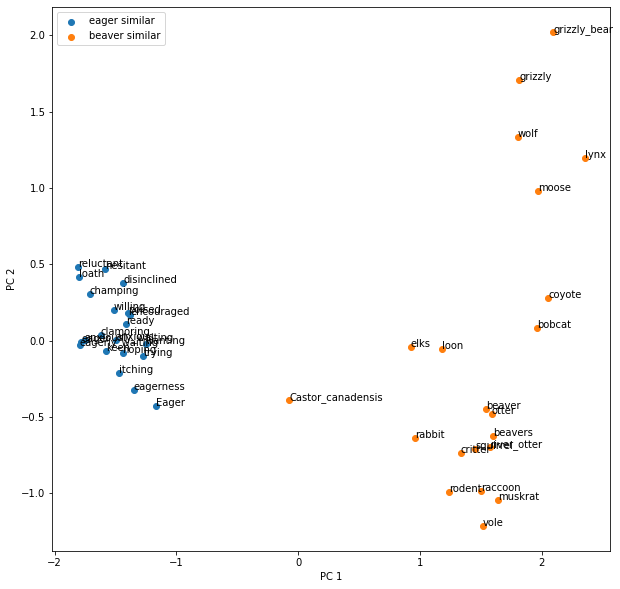

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def query_words(words):
    queried = np.ones((len(words), compute_dimensionality(vectors)))
    for i, word in enumerate(words):
        queried[i,:] = vectors[word]
    return queried

def get_idiom_similar(vectors, word1, word2, topn=20): 
    word1_similar = [x[0] for x in vectors.most_similar(word1, topn = topn)]
    word2_similar = [x[0] for x in vectors.most_similar(word2, topn = topn)] 
    return (word1_similar, word2_similar)

def plot_idiom_similar(word1, word1_similar, word2, word2_similar):
    words = [word1] + word1_similar + [word2] + word2_similar
    X = query_words(words)
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)

    plt.figure(figsize=(10, 10))
    s = len(eager_similar)+1
    plt.scatter(result[:s,0], result[:s,1], label=word1 + " similar")
    plt.scatter(result[s:,0], result[s:,1], label=word2 + " similar")
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.legend()
    plt.show()

(eager_similar, beaver_similar) = get_idiom_similar(vectors, "eager", "beaver")
plot_idiom_similar("eager", eager_similar, "beaver", beaver_similar)

### 3.1: Why do you think the vector embedings for "eager" and "beaver" are far apart?

They are very different words showcasing very different concepts. The idiom is also not super common. One is an animal and the other an adjective. Thus, the words closest to "beaver" are coyote, bobcat, rabbit, moose, etc., while those closest to "eager" are ready, willing, and even reluctant.

### 3.2: Run the same code for a different two word idiom of your choosing. What do you expect to happen? Is this any different than the "eager beaver" example? 

If you can't think of another two word idiom, ChatGPT is quite good at coming up with them.

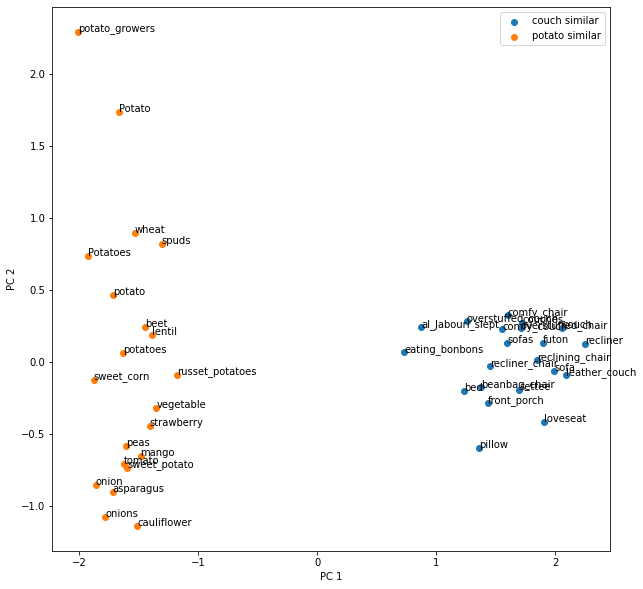

In [36]:
word1 = "couch" # TODO your word here
word2 = "potato" # TODO your word here

(word1_similar, word2_similar) = get_idiom_similar(vectors, word1, word2)
plot_idiom_similar(word1, word1_similar, word2, word2_similar)

It makes sense because "couch" and "potato" are quite different words and thus quite separated in the vector space. The ones most similar to "potato" are other vegetables, e.g., beet, peas, onions, while the ones most similar to "couch" are other furniture such as pillow, recliner, sofas, futon, etc.

This is the end of the assignment. 

However, if you want to explore visual representations of the word2vec embedings more check out http://projector.tensorflow.org/ for a fun visualization to play with. 

Pieces of this notebook was adapted with permission CIS 530 at UPenn from Spring 2018.